# import the bootstrap warming data

In [5]:
# read the bootstrap_means_da
import xarray as xr

TEMP_bootstrap_means = xr.open_dataarray('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP_bootstrap_means.nc')
TEMP_bootstrap_means=TEMP_bootstrap_means.values
TEMP_bootstrap_means.shape

(1000, 788)

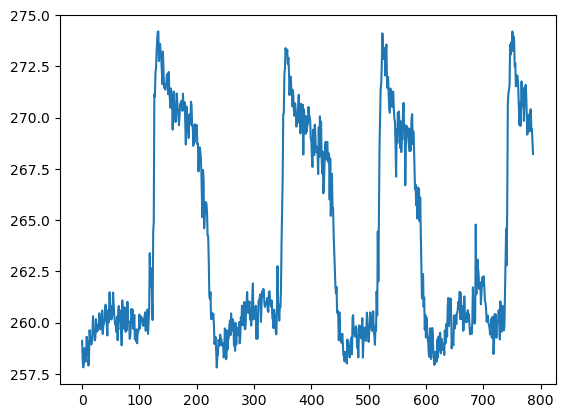

In [7]:
import matplotlib.pyplot as plt

plt.plot(TEMP_bootstrap_means[0, :])

In [3]:
import matplotlib.pyplot as plt

def crop_warming(data, transitions, left_win, right_win, plot=False):
    """
    Crop the data around given transition points and optionally plot the cropped sections.
    
    Parameters:
    - data: The dataset from which to crop sections.
    - transitions: A list of indices representing abrupt warming transitions.
    - left_win: The number of points to include before the transition.
    - right_win: The number of points to include after the transition.
    - plot: A boolean flag to enable/disable plotting of the cropped sections.
    
    Returns:
    - cropped_sections: A list of cropped sections from the dataset.
    """
    cropped_sections = []
    if plot:
        fig, axes = plt.subplots(nrows=len(transitions), figsize=(4, 2 * len(transitions)))
        if len(transitions) == 1:  # Ensure axes is always iterable
            axes = [axes]
    for i, transition in enumerate(transitions):
        start_idx = max(0, transition - left_win)
        end_idx = min(len(data), transition + right_win)
        cropped_section = data[start_idx:end_idx]
        cropped_sections.append(cropped_section)
        if plot:
            axes[i].plot(cropped_section)
            axes[i].set_title(f'Transition at {transition}')
            axes[i].axvline(x=left_win, color='r', linestyle='--', label='Transition Point')
            axes[i].legend()
    if plot:
        plt.tight_layout()
        plt.show()
    
    return cropped_sections



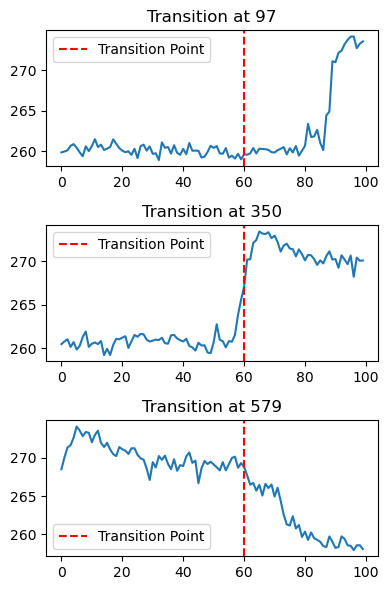

In [8]:
# Example usage of the function
left_win = 60  # Points to include before the transition
right_win = 40  # Points to include after the transition
# Plotting the first 5 transitions for demonstration
warmings=crop_warming(TEMP_bootstrap_means[0,:], final_abrupt_transitions, left_win, right_win, plot=True)